In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [55]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\ADMIN\\.keras\\datasets\\auto-mpg.data'

In [56]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [57]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [58]:
dataset = dataset.dropna()

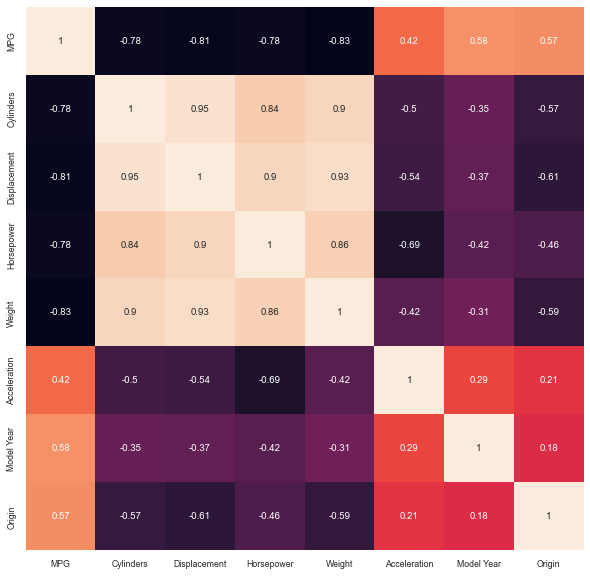

In [59]:
#상관 관계 행렬
data_corr=dataset.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [60]:
dataset.shape

(392, 8)

In [61]:
n_features = 1
X = dataset.iloc[:,1:8].values

In [62]:
#Splitting the data into training and test test
X = X.reshape((X.shape[0], X.shape[1], n_features))
Y = dataset.iloc[:,0].values
'''
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values
'''

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [63]:
X

array([[[  8. ],
        [307. ],
        [130. ],
        ...,
        [ 12. ],
        [ 70. ],
        [  1. ]],

       [[  8. ],
        [350. ],
        [165. ],
        ...,
        [ 11.5],
        [ 70. ],
        [  1. ]],

       [[  8. ],
        [318. ],
        [150. ],
        ...,
        [ 11. ],
        [ 70. ],
        [  1. ]],

       ...,

       [[  4. ],
        [135. ],
        [ 84. ],
        ...,
        [ 11.6],
        [ 82. ],
        [  1. ]],

       [[  4. ],
        [120. ],
        [ 79. ],
        ...,
        [ 18.6],
        [ 82. ],
        [  1. ]],

       [[  4. ],
        [119. ],
        [ 82. ],
        ...,
        [ 19.4],
        [ 82. ],
        [  1. ]]])

In [64]:
X.shape

(392, 7, 1)

In [65]:
Y

array([18. , 15. , 18. , 16. , 17. , 15. , 14. , 14. , 14. , 15. , 15. ,
       14. , 15. , 14. , 24. , 22. , 18. , 21. , 27. , 26. , 25. , 24. ,
       25. , 26. , 21. , 10. , 10. , 11. ,  9. , 27. , 28. , 25. , 19. ,
       16. , 17. , 19. , 18. , 14. , 14. , 14. , 14. , 12. , 13. , 13. ,
       18. , 22. , 19. , 18. , 23. , 28. , 30. , 30. , 31. , 35. , 27. ,
       26. , 24. , 25. , 23. , 20. , 21. , 13. , 14. , 15. , 14. , 17. ,
       11. , 13. , 12. , 13. , 19. , 15. , 13. , 13. , 14. , 18. , 22. ,
       21. , 26. , 22. , 28. , 23. , 28. , 27. , 13. , 14. , 13. , 14. ,
       15. , 12. , 13. , 13. , 14. , 13. , 12. , 13. , 18. , 16. , 18. ,
       18. , 23. , 26. , 11. , 12. , 13. , 12. , 18. , 20. , 21. , 22. ,
       18. , 19. , 21. , 26. , 15. , 16. , 29. , 24. , 20. , 19. , 15. ,
       24. , 20. , 11. , 20. , 19. , 15. , 31. , 26. , 32. , 25. , 16. ,
       16. , 18. , 16. , 13. , 14. , 14. , 14. , 29. , 26. , 26. , 31. ,
       32. , 28. , 24. , 26. , 24. , 26. , 31. , 19

In [66]:
Y.shape

(392,)

In [67]:
n_steps = X.shape[1]
n_steps

7

In [68]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Input, Dense
from keras import models
from keras import layers

In [86]:
from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(layers.Dense(1))
    #model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    model.compile(loss='mse', optimizer=Adam(lr=0.0062), metrics=['mse'])

    return model

model = build_model() 

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 6, 64)             192       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 3, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 192)               0         
                                                                 
 dense_21 (Dense)            (None, 50)                9650      
                                                                 
 dense_22 (Dense)            (None, 50)                2550      
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                      

In [87]:
model.fit(X_train, y_train, epochs=100, batch_size=120, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 3ms/step - loss: 29.8573 - mse: 29.8573


In [88]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=120,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=0)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
3/3 [==============================] - 0s 18ms/step - loss: 36.2701 - mse: 36.2701 - val_loss: 32.4223 - val_mse: 32.4223
Epoch 2/100
3/3 [==============================] - 0s 9ms/step - loss: 35.3839 - mse: 35.3839 - val_loss: 28.1023 - val_mse: 28.1023
Epoch 3/100
3/3 [==============================] - 0s 9ms/step - loss: 34.4781 - mse: 34.4781 - val_loss: 28.4756 - val_mse: 28.4756
Epoch 4/100
3/3 [==============================] - 0s 9ms/step - loss: 34.1296 - mse: 34.1296 - val_loss: 28.1349 - val_mse: 28.1349
Epoch 5/100
3/3 [==============================] - 0s 7ms/step - loss: 32.9062 - mse: 32.9062 - val_loss: 28.9429 - val_mse: 28.9429
Epoch 6/100
3/3 [==============================] - 0s 9ms/step - loss: 33.3980 - mse: 33.3980 - val_loss: 26.7557 - val_mse: 26.7557
Epoch 7/100
3/3 [==============================] - 0s 9ms/step - loss: 32.4801 - mse: 32.4801 - val_loss: 27.4120 - val_mse: 27.4120
Epoch 8/100
3/3 [==============================] - 0s 9ms/step - los

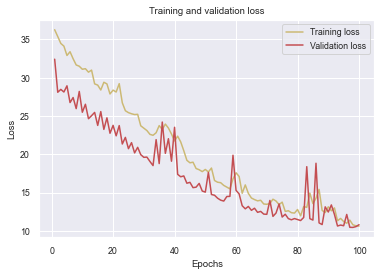

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()